In [14]:
# Step 1: Preparing data sets
from sklearn.model_selection import train_test_split
import pandas as pd

# Read file and load data
data = pd.read_csv("nursery.data.csv", header=None)

# Define column names
columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'target']
data.columns = columns

print("[THE ORIGINAL SET]\n", data)
print("------------------------------------\n")

# Define ratios for train/test split
ratioList = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]

# List to store train/test splits
data_splits = []

#Spliting data 
for ratio in ratioList:
    # Splitting data 
    X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], 
                                                        train_size=ratio[0], test_size=ratio[1], 
                                                        shuffle=True, random_state=50, stratify=data['target'])
    
    # Store the splits in a dictionary
    split = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }
    
    data_splits.append(split)
    print("RATIO TRAIN/TEST: ", ratio)
    print("[Feature_train]\n",X_train)
    print("------------------------------------\n")
    print("[Label_train]\n",y_train)
    print("------------------------------------\n")
    print("[Feature_test]\n",X_test)
    print("------------------------------------\n")
    print("[Label_test]\n",y_test)
    print("------------------------------------\n")

[THE ORIGINAL SET]
           parents   has_nurs      form children     housing     finance  \
0           usual     proper  complete        1  convenient  convenient   
1           usual     proper  complete        1  convenient  convenient   
2           usual     proper  complete        1  convenient  convenient   
3           usual     proper  complete        1  convenient  convenient   
4           usual     proper  complete        1  convenient  convenient   
...           ...        ...       ...      ...         ...         ...   
12955  great_pret  very_crit    foster     more    critical      inconv   
12956  great_pret  very_crit    foster     more    critical      inconv   
12957  great_pret  very_crit    foster     more    critical      inconv   
12958  great_pret  very_crit    foster     more    critical      inconv   
12959  great_pret  very_crit    foster     more    critical      inconv   

              social       health      target  
0            nonprob  recommend

In [15]:
# Step 2: Building the decision tree classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
import pydotplus

for ratio in ratioList:
    treeClassifier = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=50)

    # Label encoding for categorical variables
    label_encoders = {}
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    for col in columns[:-1]:  # Exclude the target variable
        le = LabelEncoder()
        X_train_encoded[col] = le.fit_transform(X_train[col])
        X_test_encoded[col] = le.transform(X_test[col])
        label_encoders[col] = le

    treeClassifier.fit(X_train_encoded, y_train)

    # Visualize the decision tree
    dot_data = export_graphviz(treeClassifier, out_file=None, 
                            feature_names=columns[:-1],  
                            class_names=y_train.unique(),  
                            filled=True, rounded=True,  
                            special_characters=True)  

    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(f"decision_tree_ratio_{ratio[0]}_{ratio[1]}.png")

Classification Report (ratio 0.4/0.6):
               precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       432
    priority       1.00      1.00      1.00       427
  spec_prior       1.00      1.00      1.00       404
  very_recom       0.97      1.00      0.99        33

    accuracy                           1.00      1296
   macro avg       0.99      1.00      0.99      1296
weighted avg       1.00      1.00      1.00      1296

Classification Report (ratio 0.6/0.4):
               precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       432
    priority       1.00      1.00      1.00       427
  spec_prior       1.00      1.00      1.00       404
  very_recom       0.97      1.00      0.99        33

    accuracy                           1.00      1296
   macro avg       0.99      1.00      0.99      1296
weighted avg       1.00      1.00      1.00      1296

Classification Report (ratio 0.8/0.2):
           

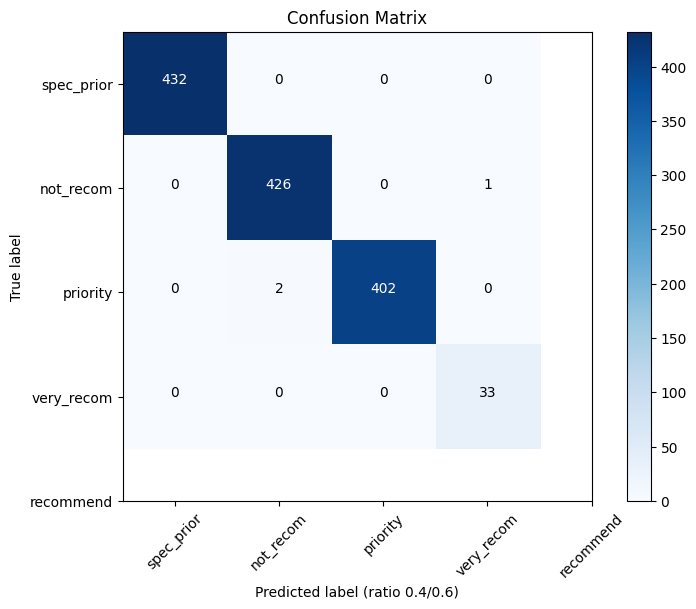

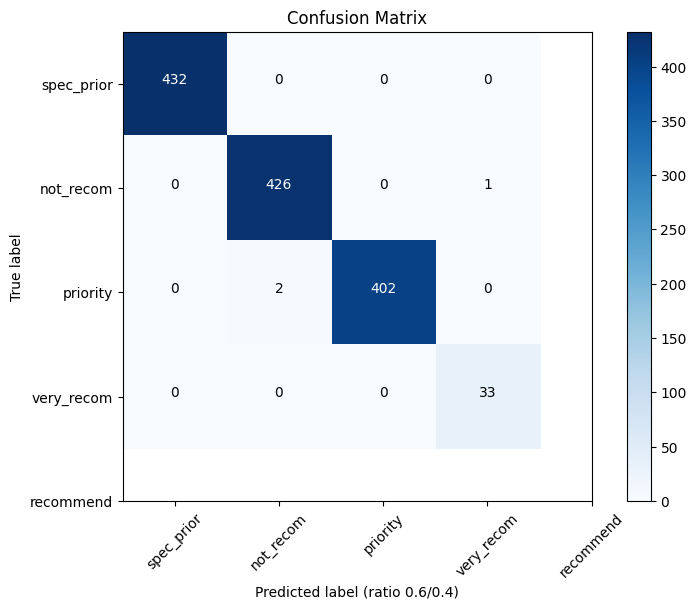

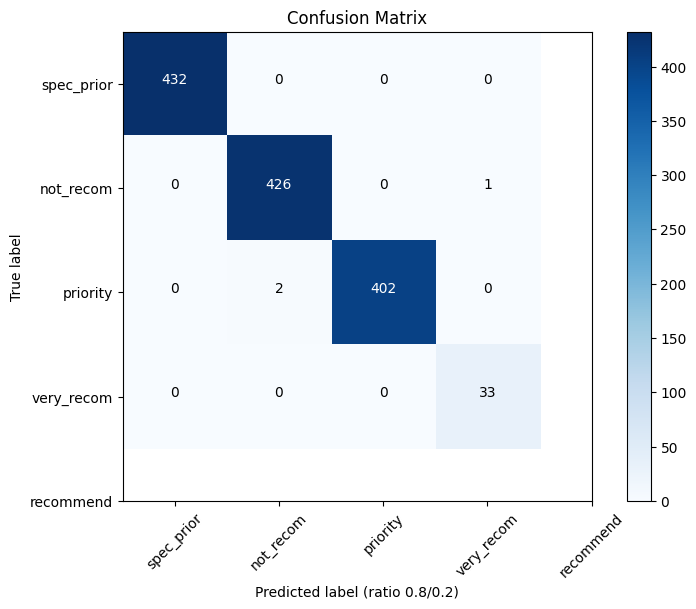

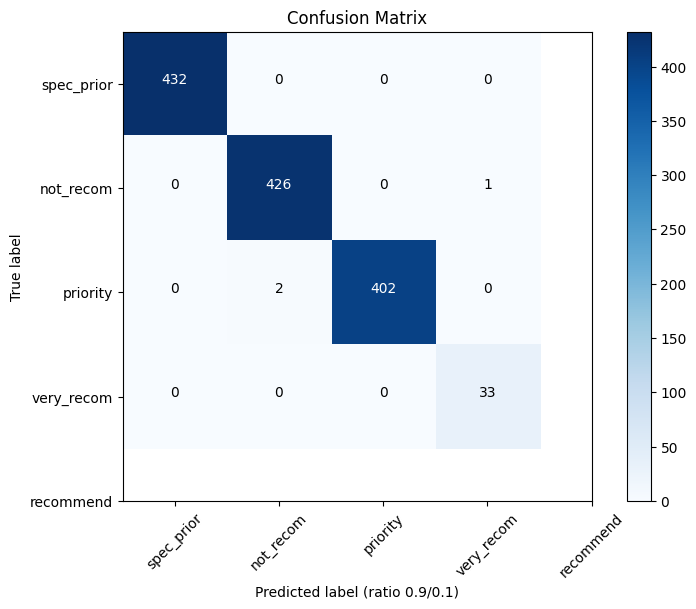

In [22]:
# Step 3: Evaluating the decision tree classifiers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

for ratio in ratioList:
    # Predict on the test set
    y_pred = treeClassifier.predict(X_test_encoded)

    # classification_report
    print(f"Classification Report (ratio {ratio[0]}/{ratio[1]}):\n", classification_report(y_test, y_pred))

    # confusion_matrix.
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    classes = y_train.unique()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in [(i, j) for i in range(cm.shape[0]) for j in range(cm.shape[1])]:
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    #Displaying the confusion matrix
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel(f'Predicted label (ratio {ratio[0]}/{ratio[1]})')
    plt.savefig(f'confusion_matrix_ratio_{ratio[0]}_{ratio[1]}.png', bbox_inches='tight')

In [25]:
#Step 4: The depth and accuracy of a decision tree (80/20)
from sklearn.metrics import accuracy_score
import graphviz
import numpy as np

print("[The depth and accuracy of a decision tree (80/20)]")
X_train, X_test, y_train, y_test = data_splits[2].values()

# Building the decision tree classifiers for different max_depth values
max_depth_values = [None, 2, 3, 4, 5, 6, 7]
accuracy_scores = []

for max_depth in max_depth_values:
    # Building the decision tree classifiers
    treeClassifier = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=50)
    
    # Label encoding for categorical features
    label_encoders = {}
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    for col in columns[:-1]:  # Exclude the target variable
        le = LabelEncoder()
        X_train_encoded[col] = le.fit_transform(X_train[col])
        X_test_encoded[col] = le.transform(X_test[col])
        label_encoders[col] = le

    treeClassifier.fit(X_train_encoded, y_train)
    
    # Predict on the test set
    y_pred = treeClassifier.predict(X_test_encoded)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(np.float32(accuracy))
    
    # Visualize the decision tree
    dot_data = export_graphviz(treeClassifier, out_file=None, 
                               feature_names=columns[:-1],  
                               class_names=y_train.unique(),  
                               filled=True, rounded=True,  
                               special_characters=True)  

    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(f"decision_tree_max_depth_{max_depth}.png")

print("Accuracy Scores for Different max_depth Values:")
print("max_depth\tAccuracy")
for i, (max_depth, accuracy) in enumerate(zip(max_depth_values, accuracy_scores)):
    print(f"{max_depth}\t\t{accuracy:.4f}")

[The depth and accuracy of a decision tree (80/20)]
Accuracy Scores for Different max_depth Values:
max_depth	Accuracy
None		0.9965
2		0.7623
3		0.8083
4		0.8584
5		0.8735
6		0.8819
7		0.9113
